In [1]:
import rioxarray as rxr
import xarr
import numpy as np
import codebase
import matplotlib.pyplot as plt

# Parameters

In [13]:
dam_name = 'glen canyon'
reproj_crs_code = 54017

# Load data

## Load reservoir shapes

In [7]:
res_shp = codebase.load_data.load_GRanD()

In [8]:
subset_gpd = codebase.area_subsets.check_for_multiple_dams(dam_name,res_shp)
subset_bbox = subset_gpd.geometry.buffer(0).bounds
subset_bbox

,minx,miny,maxx,maxy
596,-111.570835,36.937778,-111.221875,37.105153


## Load DEM data

In [2]:
dem_filepath = '/global/scratch/users/ann_scheliga/aux_dam_datasets/'
dem_filename = 'n30w120_con.tif'

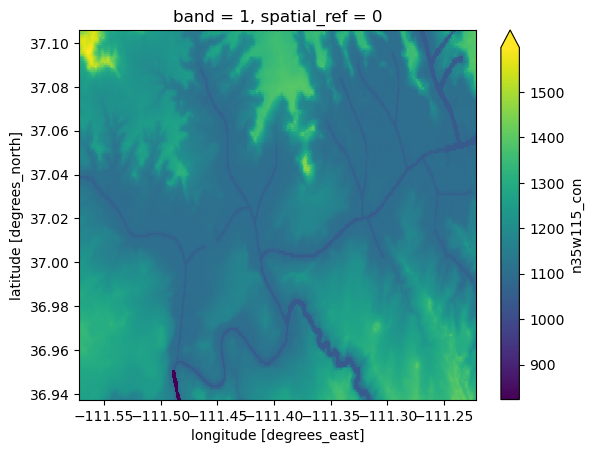

In [5]:
DEM = codebase.load_data.load_DEM_subset_as_rxrDA(subset_bbox,dem_filepath,dem_filename)
DEM_masked = DEM.where(DEM < 30000) # Lake Mead has 6 outlier pixels
DEM_masked.plot(cbar_kwargs={'extend':'max'})

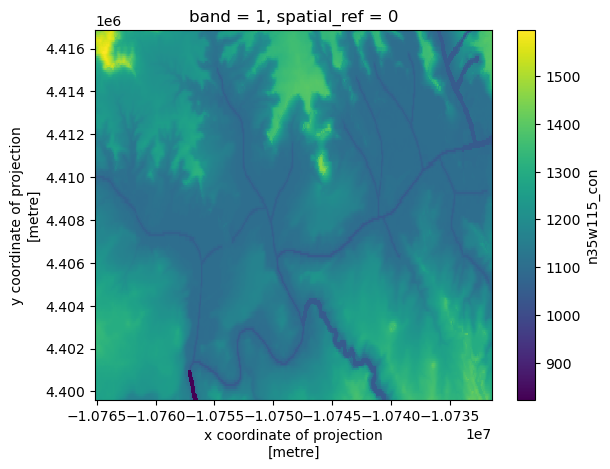

In [6]:
DEM_reproj = codebase.area_calcs.project_DA_from_crs_code(DEM_masked,reproj_crs_code)
DEM_reproj.plot()

In [15]:
DEM_reproj.shape

(1, 212, 415)

## Load CYGNSS data

In [30]:
fw_latlon = codebase.load_data.load_CYGNSS_001_all_months(subset_bbox)
fw_binary = codebase.area_calcs.cygnss_convert_to_binary(fw_latlon)
fw_reproj = codebase.area_calcs.project_DA_from_crs_code(fw_binary,reproj_crs_code)

# Data processing

## Match and combine DEM and CYGNSS data

In [32]:
fw_res_match = fw_reproj.rio.reproject_match(DEM_reproj)

Full shape: (57, 212, 415)


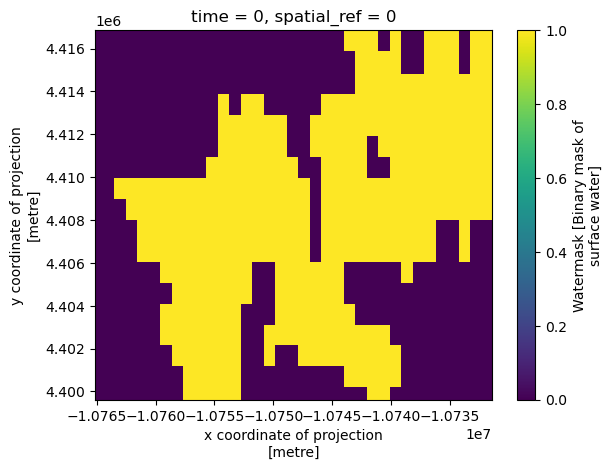

In [37]:
xr.